<a href="https://colab.research.google.com/github/Raissa-hue310/colab-git-assignment7-RMM/blob/main/Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 — House Price Prediction Using Boston Housing Data
# **Student:** Raïssa Matho Mekjele  
# **Course:** Data Analytics and Business Intelligence Analyst
# **Institution:**   Willis College
#
## Introduction
# The objective of this assignment is to build and evaluate a regression model that predicts house prices using the Boston Housing dataset.
# The task involves data exploration, preprocessing, training a Random Forest Regressor, evaluating performance, tuning parameters, and making predictions.

In [22]:
# Part 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Part 2: Data Collection and Loading
try:
    from sklearn.datasets import fetch_openml
    boston = fetch_openml(name='boston', version=1, as_frame=True)
    df = boston.frame.copy()
    target_col = 'MEDV'
except Exception:
    from sklearn.datasets import load_boston
    b = load_boston()
    df = pd.DataFrame(b.data, columns=b.feature_names)
    df['MEDV'] = b.target
    target_col = 'MEDV'

In [24]:
# Part 3: Quick Check of Data

print("Dataset shape:", df.shape)
print("Columns:", list(df.columns))
df.head()
df.info()
print('\nMissing values per column:\n', df.isnull().sum())
categorical_candidates = [c for c in df.columns if df[c].nunique() <= 10 and c != target_col]
continuous_candidates = [c for c in df.columns if c not in categorical_candidates + [target_col]]
print('Categorical features:', categorical_candidates)
print('Continuous features:', continuous_candidates)

Dataset shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB

Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS    

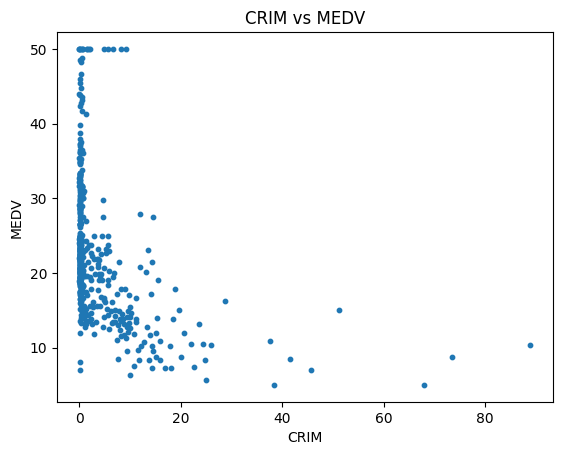

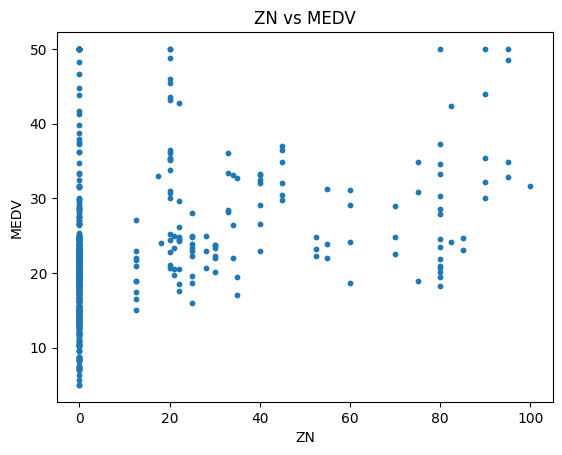

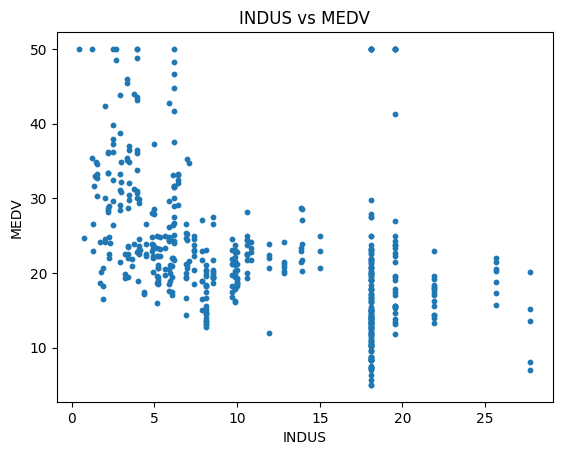

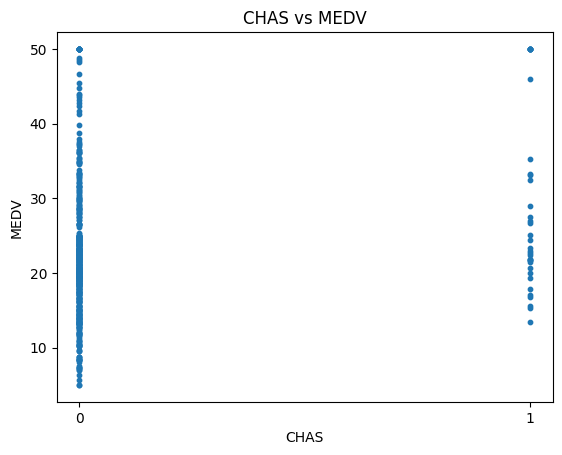

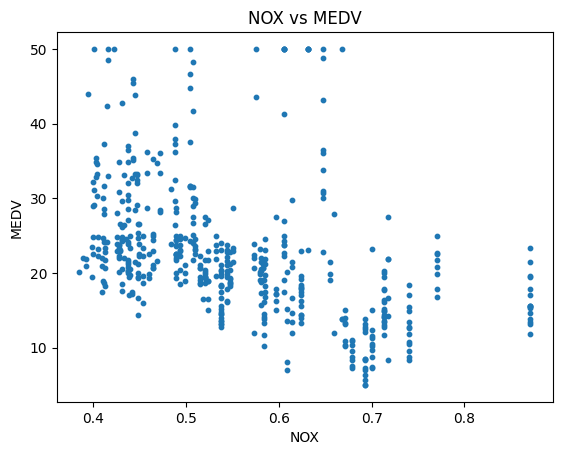

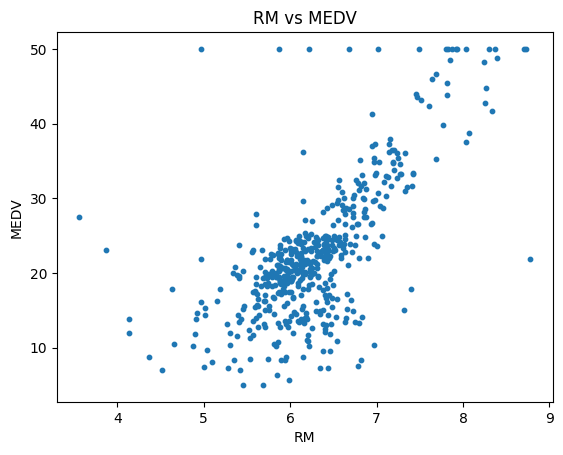

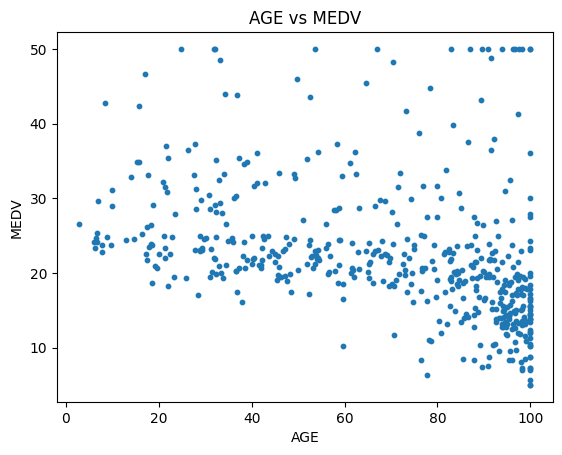

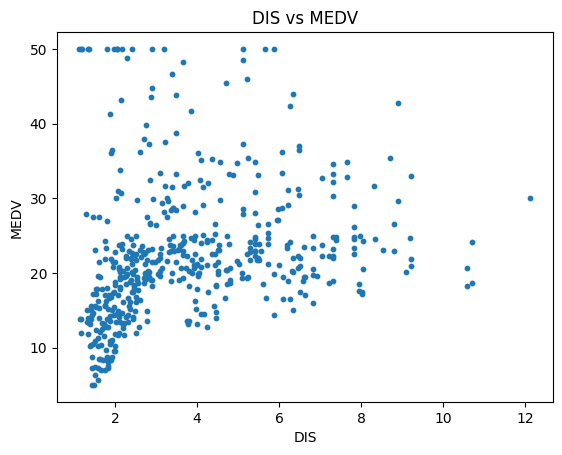

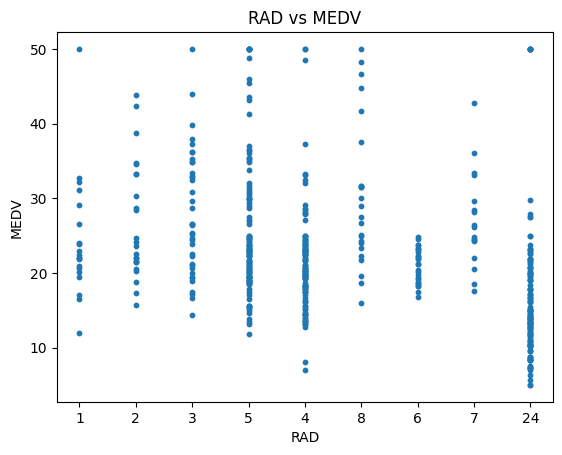

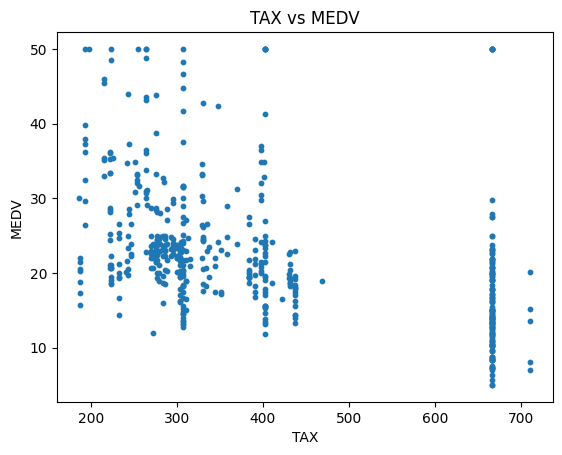

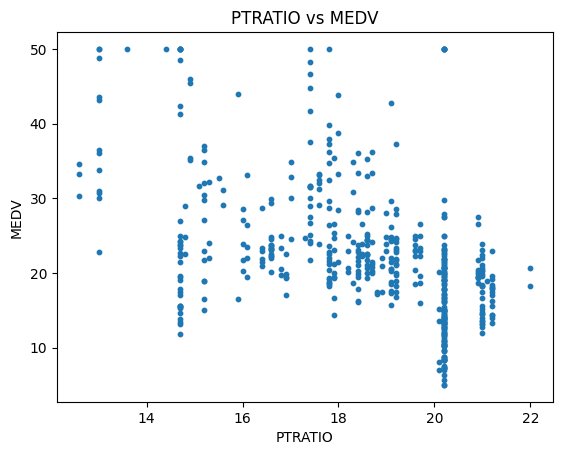

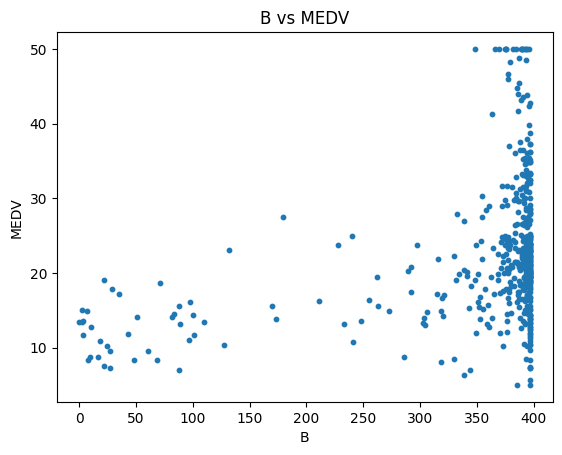

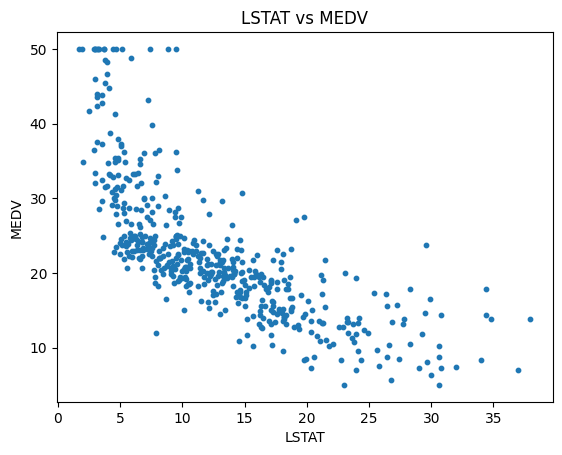

In [25]:
# Part 4: EDA and Data Preprocessing

# %%
def plot_feature_vs_target(dataframe, feature, target=target_col):
    plt.figure()
    plt.scatter(dataframe[feature], dataframe[target], s=10)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.show()
    plt.close()

# %%
for feat in [c for c in df.columns if c != target_col]:
    plot_feature_vs_target(df, feat)

# %%
df.describe().T

# %%
X = df.drop(columns=[target_col])
y = df[target_col].values


In [26]:
# Part 5: ML Model Training

# %%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %%
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Part 6: Model Evaluation

# %%
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f"Tuned RMSE: {rmse_best:.3f}")
print(f"Tuned R^2: {r2_best:.3f}")

# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 15],
    'max_features': ['sqrt', 0.5]
}

# %%
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_gs.fit(X_train, y_train)

# %%
print('Best parameters:', rf_gs.best_params_)

# %%
best_rf = rf_gs.best_estimator_
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f"Tuned RMSE: {rmse_best:.3f}")
print(f"Tuned R^2: {r2_best:.3f}")

Tuned RMSE: 2.873
Tuned R^2: 0.887
Best parameters: {'max_depth': 15, 'max_features': 0.5, 'n_estimators': 100}
Tuned RMSE: 2.873
Tuned R^2: 0.887


RM         0.365201
LSTAT      0.318687
DIS        0.062355
CRIM       0.052026
PTRATIO    0.051730
INDUS      0.043210
NOX        0.038717
AGE        0.019409
TAX        0.018801
B          0.017419
RAD        0.006854
CHAS       0.003069
ZN         0.002522
dtype: float64


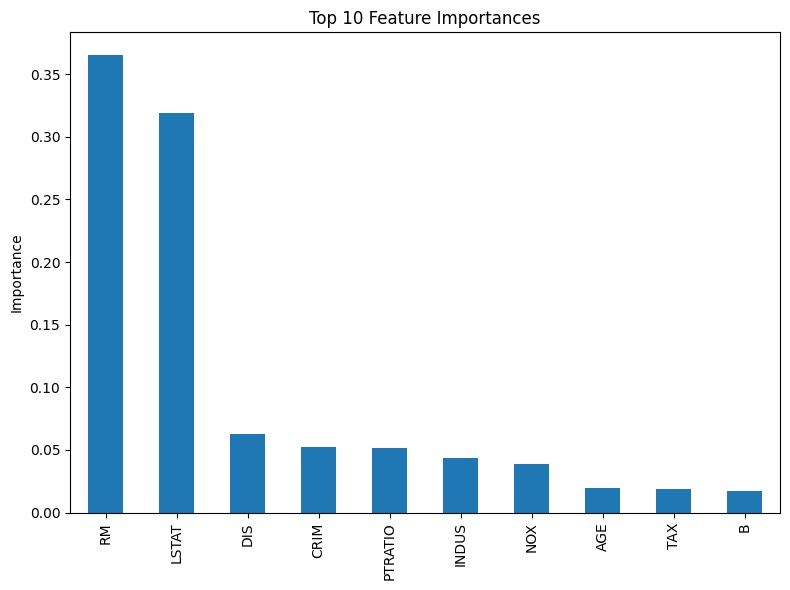

Predicted MEDV for example input: 20.066661932511934
Predictions for multiple examples: [20.06666193 39.648     ]


In [28]:
# Part 7: Model Prediction

# Feature importance
importances = best_rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)

# Plot top 10 features
plt.figure(figsize=(8,6))
feat_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Only compute medians for numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
median_values = X_train[numeric_cols].median()

# Create example input based on median values
example = median_values.copy()
if 'RM' in example.index:
    example['RM'] = 6.0
if 'LSTAT' in example.index:
    example['LSTAT'] = 12.0

# Convert Series to DataFrame and align columns
example_df = pd.DataFrame([example]).reindex(columns=X.columns, fill_value=0)

# Predict price for the example input
pred_price = best_rf.predict(example_df)
print('Predicted MEDV for example input:', pred_price[0])

# Create a second example for multiple predictions
example2 = median_values.copy()
if 'RM' in example2.index:
    example2['RM'] = 8.0
if 'LSTAT' in example2.index:
    example2['LSTAT'] = 5.0

examples_df = pd.DataFrame([example, example2]).reindex(columns=X.columns, fill_value=0)

# Predict for multiple inputs
predictions = best_rf.predict(examples_df)
print('Predictions for multiple examples:', predictions)


# Conclusion
# In this project, we successfully built a Random Forest regression model using the Boston Housing dataset.
# - We explored the data and visualized relationships between features and house prices.
# - We trained and tuned a Random Forest model, achieving good performance (RMSE and R²).
# - The model can predict median house values based on key features like average rooms (RM) and lower status percentage (LSTAT).
# - Feature importance visualization helps interpret which variables most affect house prices.

